<a href="https://colab.research.google.com/github/NatashaKamami/Machine-Learning-1/blob/main/Blueberries_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Importing the necessary libraries and loading the datasets**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
training_data = pd.read_csv('/content/train.csv')
testing_data = pd.read_csv('/content/test.csv')

In [ ]:
training_data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [ ]:
testing_data.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [ ]:
training_data.isnull().sum()

,0
id,0
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0
MaxOfLowerTRange,0


##**Data Analysis**

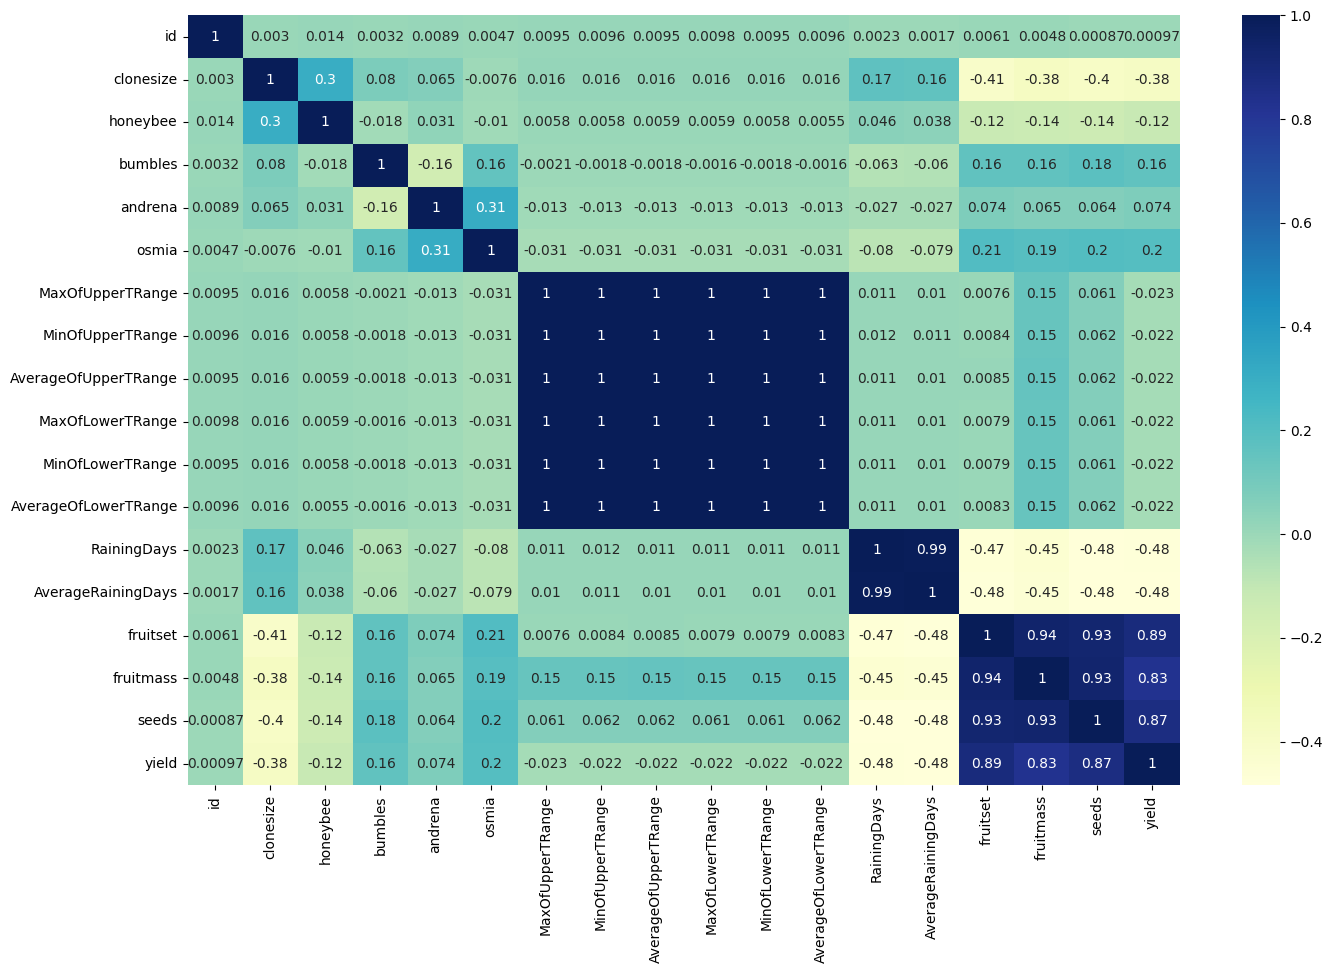

In [ ]:
# correlation of variables
plt.figure(figsize = (16, 10))
sns.heatmap(training_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

###**Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
# Defining Feature and Target variables
X_train = training_data[['id','clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'AverageRainingDays', 'seeds']]
y_train = training_data['yield']
X_test = testing_data[['id','clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'AverageRainingDays', 'seeds']]

In [ ]:
# Splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression
model1 = make_pipeline(StandardScaler(), LinearRegression())
model1.fit(X_train, y_train)

# Predict on validation data
y_pred = model1.predict(X_val)
print("Mean Absolute Error:", mean_absolute_error(y_val, y_pred))

Mean Absolute Error: 424.03892343567856


In [ ]:
# Polynomial Regression
model2 = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
model2 = model2.fit(X_train, y_train)

# Predict on validation data
y_pred = model2.predict(X_val)
print('Mean absolute error:', mean_absolute_error(y_val, y_pred))

Mean absolute error: 408.2011334056677


###**Lasso Regression**

In [ ]:
# Lasso Regression
lasso = make_pipeline(StandardScaler(), Lasso(alpha=1.0))
lasso = lasso.fit(X_train, y_train)

# Predict on validation data
y_pred = lasso.predict(X_val)
print('Mean absolute error:', mean_absolute_error(y_val, y_pred))

Mean absolute error: 424.1777255666543


In [ ]:
# Lasso Polynomial Regression
lasso = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Lasso(alpha=1.0))
lasso = lasso.fit(X_train, y_train)

# Predict on validation data
y_pred = lasso.predict(X_val)
print('Mean absolute error:', mean_absolute_error(y_val, y_pred))

Mean absolute error: 405.3994062970899


###**Ridge Regression**

In [ ]:
# Ridge Regression
ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge = ridge.fit(X_train, y_train)

# Predict on validation data
y_pred =ridge.predict(X_val)
print('Mean absolute error:', mean_absolute_error(y_val, y_pred))

Mean absolute error: 424.1637944182361


In [ ]:
# Ridge Polynomial Regression
ridge = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Ridge(alpha=1.0))
ridge = ridge.fit(X_train, y_train)

# Predict on validation data
y_pred =ridge.predict(X_val)
print('Mean absolute error:', mean_absolute_error(y_val, y_pred))

Mean absolute error: 407.0962110338785


###**Elastic Net Regression**

In [ ]:
# Elastic Net Regression
elasticnet = make_pipeline(StandardScaler(), ElasticNet(alpha=1.0, l1_ratio=0.9))
elasticnet = elasticnet.fit(X_train, y_train)

# Predict on validation data
y_pred = elasticnet.predict(X_val)
print('Mean absolute error:', mean_absolute_error(y_val, y_pred))

Mean absolute error: 449.01070217572004


In [ ]:
# Elastic Net Polynomial Regression
elasticnet = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), ElasticNet(alpha=1.0, l1_ratio=0.9))
elasticnet = elasticnet.fit(X_train, y_train)

# Predict on validation data
y_pred = elasticnet.predict(X_val)
print('Mean absolute error:', mean_absolute_error(y_val, y_pred))

Mean absolute error: 435.06393612753703


##**Predicting on the test data**

In [ ]:
# Final predictions on test data with the best model
lasso= make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Lasso(alpha=1.0))
lasso = lasso.fit(X_train, y_train)
final_predictions = lasso.predict(X_test)

In [ ]:
# Saving predicted yields into a CSV file
submission = pd.DataFrame({'id': testing_data['id'], 'yield': final_predictions})
submission.to_csv('submission.csv', index=False)

In [ ]:
submission = pd.read_csv('/content/submission.csv')
submission.head()

,id,yield
0,15289,4399.722161
1,15290,6517.455823
2,15291,7072.163083
3,15292,5123.894338
4,15293,3989.144163
